In [2]:
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json
import os
import seaborn as sns
from scipy.stats import pearsonr


In [3]:
cur_dir = os.path.dirname(os.path.abspath('.'))
cnt_params = {}

fisher_load_path = './experiments/default-tmp_EWC_1000000_plot/2024-09-27-09-59-52/EWC_fisher_task_0.pkl'
fisher_load_path = os.path.join(cur_dir, fisher_load_path)
with open(fisher_load_path, 'rb') as f:
    fisher_matrix = pickle.load(f)
    for k in fisher_matrix.keys():
        cnt_params[k] = fisher_matrix[k].flatten().shape[0]
        fisher_matrix[k] = fisher_matrix[k].mean().item()

sine_load_path = './visualization-orthogonal/sine_value_all_SEQ_qa_task1_first200steps<->qa_task1_after200steps_L2F.pkl'
sine_load_path = os.path.join(cur_dir, sine_load_path)
with open(sine_load_path, 'rb') as f:
    sine_value = pickle.load(f)
    for k in sine_value.keys():
        sine_value[k] = np.mean(sine_value[k])
        
component_list = sorted(list(sine_value.keys()))
component_list_full = sorted(list(fisher_matrix.keys()))

print(component_list)
print(component_list_full)
# assert component_list == component_list_2


['embed_out.weight', 'gpt_neox.embed_in.weight', 'gpt_neox.layers.0.attention.dense.weight', 'gpt_neox.layers.0.attention.query_key_value.weight', 'gpt_neox.layers.0.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.0.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.1.attention.dense.weight', 'gpt_neox.layers.1.attention.query_key_value.weight', 'gpt_neox.layers.1.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.1.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.10.attention.dense.weight', 'gpt_neox.layers.10.attention.query_key_value.weight', 'gpt_neox.layers.10.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.10.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.11.attention.dense.weight', 'gpt_neox.layers.11.attention.query_key_value.weight', 'gpt_neox.layers.11.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.11.mlp.dense_h_to_4h.weight', 'gpt_neox.layers.2.attention.dense.weight', 'gpt_neox.layers.2.attention.query_key_value.weight', 'gpt_neox.layers.2.mlp.dense_4h_to_h.weight', 'gpt_neox.layers.2.mlp.dense_h_to_4h.we

{'gpt_neox.embed_in.weight': 38612736, 'gpt_neox.layers.0.input_layernorm.weight': 768, 'gpt_neox.layers.0.input_layernorm.bias': 768, 'gpt_neox.layers.0.post_attention_layernorm.weight': 768, 'gpt_neox.layers.0.post_attention_layernorm.bias': 768, 'gpt_neox.layers.0.attention.query_key_value.weight': 1769472, 'gpt_neox.layers.0.attention.query_key_value.bias': 2304, 'gpt_neox.layers.0.attention.dense.weight': 589824, 'gpt_neox.layers.0.attention.dense.bias': 768, 'gpt_neox.layers.0.mlp.dense_h_to_4h.weight': 2359296, 'gpt_neox.layers.0.mlp.dense_h_to_4h.bias': 3072, 'gpt_neox.layers.0.mlp.dense_4h_to_h.weight': 2359296, 'gpt_neox.layers.0.mlp.dense_4h_to_h.bias': 768, 'gpt_neox.layers.1.input_layernorm.weight': 768, 'gpt_neox.layers.1.input_layernorm.bias': 768, 'gpt_neox.layers.1.post_attention_layernorm.weight': 768, 'gpt_neox.layers.1.post_attention_layernorm.bias': 768, 'gpt_neox.layers.1.attention.query_key_value.weight': 1769472, 'gpt_neox.layers.1.attention.query_key_value.bias

/tmp/ipykernel_1907050/3228203934.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15, fontweight='bold')
/tmp/ipykernel_1907050/3228203934.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=15, fontweight='bold')


<Figure size 640x480 with 0 Axes>

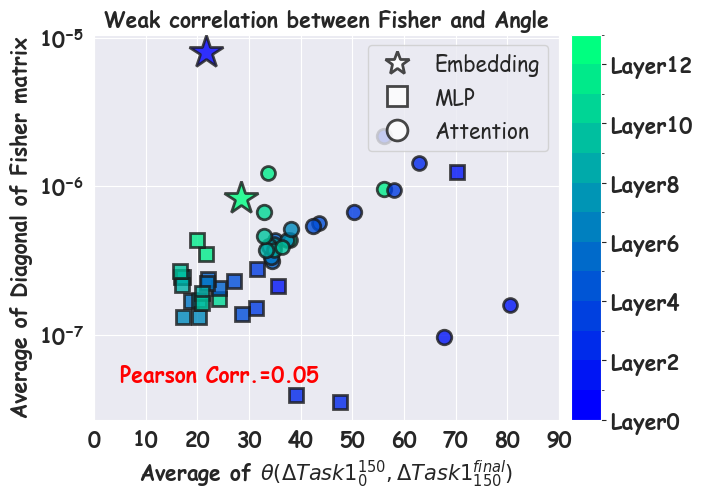

In [4]:

sns.set_theme(None)
plt.clf()
plt.rcParams['font.sans-serif'] = 'Comic Sans MS'
fig, ax = plt.subplots(figsize=(6,5))
plt.yscale('log')

print(cnt_params)
print(fisher_matrix)
print(sine_value)

cnt_params_max = 38612736
cnt_params_min =   589824

size_max = 25
size_min = 10

normalized_cnt_params = {k : size_min + (size_max-size_min)*(v-cnt_params_min)/(cnt_params_max-cnt_params_min) 
                        for k,v in cnt_params.items()}

marker_dict = {
    'embed': '*',
    'mlp': 's',
    'attention': 'o'
}
component2legend = {
    'embed': 'Embedding',
    'mlp': 'MLP',
    'attention': 'Attention'
}
component2legendsize = {
    'embed': 18,
    'mlp': 15,
    'attention': 15
}

cmap = plt.get_cmap('winter')
n_layers = 12

list_for_pearsonr_fisher = []
list_for_pearsonr_angle = []

for k in component_list:
    assert k in component_list_full, 'The component must be in fisher_matrix.keys()'
    marker='.'
    for _n in marker_dict.keys():
        if _n in k:
            marker = marker_dict[_n]
    layer_id = -1
    layer_find_bg_idx = k.find('layers.')
    if layer_find_bg_idx != -1:
        layer_find_bg_idx += len('layers.')
        layer_id = int(k[layer_find_bg_idx:].split('.')[0])
    elif 'embed_in' in k:
        layer_id = -1
    elif 'embed_out' in k:
        layer_id = n_layers
        
    list_for_pearsonr_fisher.append(fisher_matrix[k])
    list_for_pearsonr_angle.append(sine_value[k])
    
    plt.plot(sine_value[k],fisher_matrix[k],
                marker=marker,
                markersize=normalized_cnt_params[k],
                markerfacecolor=cmap((layer_id+1)/(n_layers+1)),
                markeredgecolor='k',
                markeredgewidth=2,
                alpha=0.8,
                zorder=5
                )

# Only for Pearson Correlation
r = pearsonr(list_for_pearsonr_fisher,list_for_pearsonr_angle)
print("Pearson correlation coefficient = ",r[0])
print("P-Value =",r[1])
plt.text(5, 10**(-7.2),
        s=f'Pearson Corr.={r[0]:.2f}',
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=15,
        fontweight='bold',
        color='red')
# plt.text(5, 10**(-7.35),
#         s=f'P-Value={r[1]:.2f}',
#         horizontalalignment='left',
#         verticalalignment='top',
#         fontsize=15,
#         fontweight='bold',
#         color='red')

# Only for plotting the color bar
bins = [(layer_id+1)/(n_layers+1) for layer_id in range(-1,n_layers+1)]
nbin = len(bins) - 1
cmap_bins = plt.get_cmap('winter',nbin)
norm_cmap = matplotlib.colors.BoundaryNorm(bins, nbin)
im = matplotlib.cm.ScalarMappable(norm=norm_cmap, cmap=cmap_bins)
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = matplotlib.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)
    return cax
cax = add_right_cax(ax, pad=0.02, width=0.05)
cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_ticklabels([f'Layer{layer_id+1}' for layer_id in range(-1,n_layers+1)],fontsize=15,fontweight='bold')


# Only for plotting the legend
handle_list = []
label_list = []
for k,_marker in marker_dict.items():
    _handle, = ax.plot([-1],[-1],
        marker=_marker,
        markersize=component2legendsize[k],
        markerfacecolor='white',
        markeredgecolor='k',
        markeredgewidth=2,
        alpha=0.8,
        zorder=5,
        color='k',
        linestyle='None'
        )
    handle_list.append(_handle)
    label_list.append(component2legend[k])
ax.legend(handle_list, label_list, fontsize=15)

ax.set_title('Weak correlation between Fisher and Angle',fontsize=15,fontweight='bold')
ax.set_xlim((0,90))
ax.set_xlabel('Average of $\\theta(\\Delta Task1_{0}^{150},\\Delta Task1_{150}^{final})$',fontsize=15,fontweight='bold')
ax.set_ylabel('Average of Diagonal of Fisher matrix',fontsize=15,fontweight='bold')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15, fontweight='bold')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=15, fontweight='bold')


save_dir = os.path.abspath('.')
save_name = 'ewc_scatter'
plt.savefig(os.path.join(save_dir,f'{save_name}.pdf'),dpi=1200,bbox_inches='tight',facecolor='white')
plt.savefig(os.path.join(save_dir,f'{save_name}.png'),dpi=1200,bbox_inches='tight',facecolor='white')
# print(f'Save figures to {os.path.join(save_dir)}')
plt.show()
